c:\Users\lzhang51\.conda\envs\pytorch\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch [1/10] | Train Loss: 3.1857 | Val Loss: 2.6620 | Val Acc: 0.2755
Epoch [2/10] | Train Loss: 2.4806 | Val Loss: 2.3299 | Val Acc: 0.3026
Epoch [3/10] | Train Loss: 2.2036 | Val Loss: 2.1613 | Val Acc: 0.3059
Epoch [4/10] | Train Loss: 2.0837 | Val Loss: 2.0675 | Val Acc: 0.3124
Epoch [5/10] | Train Loss: 2.0246 | Val Loss: 2.0414 | Val Acc: 0.3069
Epoch [6/10] | Train Loss: 1.9678 | Val Loss: 2.0022 | Val Acc: 0.3134
Epoch [7/10] | Train Loss: 1.9175 | Val Loss: 1.9949 | Val Acc: 0.3156
Epoch [8/10] | Train Loss: 1.8997 | Val Loss: 2.0018 | Val Acc: 0.3102
Epoch [9/10] | Train Loss: 1.8758 | Val Loss: 1.9597 | Val Acc: 0.3178
Epoch [10/10] | Train Loss: 1.8236 | Val Loss: 1.9518 | Val Acc: 0.3134


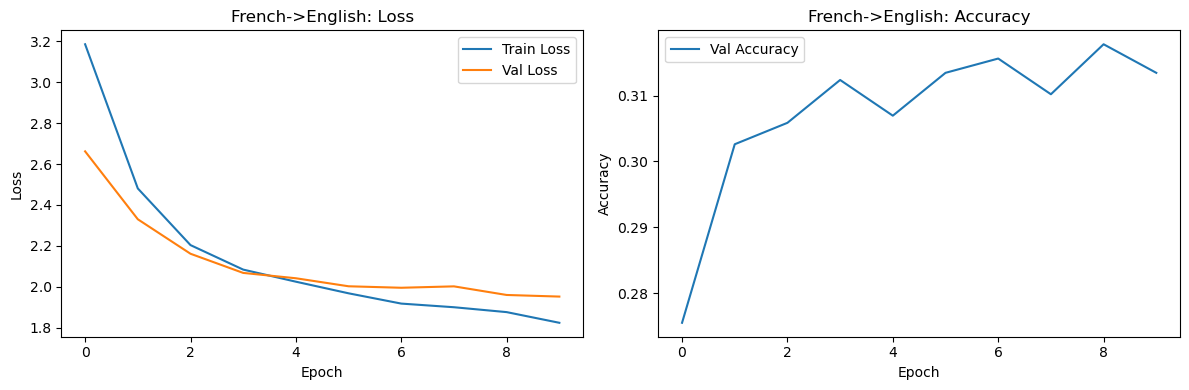


=== Final Results (French->English) ===
Train Loss: 1.8236
Val Loss:   1.9518
Val Acc:    0.3134
Params:     376183


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

###############################################################################
# 1) Large French->English Pairs
###############################################################################
pairs_fr_en = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
]

# For Problem 4 (French->English), we flip each pair so that the French string is source
# and the English string is target with <bos>/<eos> tokens
def add_special_tokens(french_str, english_str):
    bos_token = "<bos>"
    eos_token = "<eos>"
    return french_str, bos_token + " " + english_str + " " + eos_token

flipped_pairs = []
for (en, fr) in pairs_fr_en:
    fr_src, en_tgt = add_special_tokens(fr, en)
    flipped_pairs.append((fr_src, en_tgt))

###############################################################################
# 2) Build Vocabulary and Encode
###############################################################################
all_text = ""
for fr, en in flipped_pairs:
    all_text += fr + en

chars = sorted(list(set(all_text)))
char_to_int = {ch: i for i, ch in enumerate(chars)}
int_to_char = {i: ch for ch, i in char_to_int.items()}

def encode(text):
    return [char_to_int[ch] for ch in text]

def decode(indices):
    return "".join(int_to_char[i] for i in indices)

encoded_src = []
encoded_tgt = []
for fr, en in flipped_pairs:
    encoded_src.append(encode(fr))
    encoded_tgt.append(encode(en))

###############################################################################
# 3) Dataset, DataLoader
###############################################################################
class TranslationDataset(Dataset):
    def __init__(self, sources, targets):
        self.sources = sources
        self.targets = targets

    def __len__(self):
        return len(self.sources)

    def __getitem__(self, idx):
        src_seq = torch.tensor(self.sources[idx], dtype=torch.long)
        tgt_seq = torch.tensor(self.targets[idx], dtype=torch.long)
        return src_seq, tgt_seq

def collate_fn(batch):
    src_list, tgt_list = zip(*batch)
    src_padded = pad_sequence(src_list, batch_first=True, padding_value=0)
    tgt_padded = pad_sequence(tgt_list, batch_first=True, padding_value=0)
    return src_padded, tgt_padded

dataset = TranslationDataset(encoded_src, encoded_tgt)
train_size = int(len(dataset) * 0.8)
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

batch_size = 8
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

###############################################################################
# 4) Define a Transformer Encoder-Decoder
###############################################################################
class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, num_layers, nhead, forward_expansion=512, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_size,
            nhead=nhead,
            dim_feedforward=forward_expansion,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        embedded = self.embedding(x)
        output = self.transformer_encoder(embedded)
        return output

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, num_layers, nhead, forward_expansion=512, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        decoder_layer = nn.TransformerDecoderLayer(
            d_model=embed_size,
            nhead=nhead,
            dim_feedforward=forward_expansion,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(embed_size, vocab_size)

    def forward(self, tgt, enc_out):
        embedded = self.embedding(tgt)
        dec_out = self.transformer_decoder(embedded, enc_out)
        output = self.fc_out(dec_out)
        return output

class Seq2SeqTransformer(nn.Module):
    def __init__(self, vocab_size, embed_size, enc_layers, dec_layers, nhead, forward_expansion=512, dropout=0.1):
        super().__init__()
        self.encoder = Encoder(vocab_size, embed_size, enc_layers, nhead, forward_expansion, dropout)
        self.decoder = Decoder(vocab_size, embed_size, dec_layers, nhead, forward_expansion, dropout)

    def forward(self, src, tgt):
        enc_out = self.encoder(src)
        dec_out = self.decoder(tgt, enc_out)
        return dec_out

###############################################################################
# 5) Training and Evaluation
###############################################################################
def train_one_epoch(model, optimizer, criterion, loader):
    model.train()
    total_loss = 0
    for src, tgt in loader:
        src, tgt = src.to(device), tgt.to(device)
        tgt_inp = tgt[:, :-1]
        tgt_label = tgt[:, 1:]
        optimizer.zero_grad()
        output = model(src, tgt_inp)
        output_flat = output.reshape(-1, output.shape[-1])
        tgt_label_flat = tgt_label.reshape(-1)
        loss = criterion(output_flat, tgt_label_flat)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, criterion, loader):
    model.eval()
    total_loss = 0
    correct_tokens = 0
    total_tokens = 0
    with torch.no_grad():
        for src, tgt in loader:
            src, tgt = src.to(device), tgt.to(device)
            tgt_inp = tgt[:, :-1]
            tgt_label = tgt[:, 1:]
            output = model(src, tgt_inp)
            output_flat = output.reshape(-1, output.shape[-1])
            tgt_label_flat = tgt_label.reshape(-1)
            loss = criterion(output_flat, tgt_label_flat)
            total_loss += loss.item()

            preds = torch.argmax(output, dim=-1)  # [batch, tgt_len-1]
            matches = (preds == tgt_label)
            correct_tokens += matches.sum().item()
            total_tokens += matches.numel()

    avg_loss = total_loss / len(loader)
    accuracy = correct_tokens / total_tokens if total_tokens > 0 else 0
    return avg_loss, accuracy

def train_model(model, train_loader, val_loader, epochs, lr):
    model.to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=0)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses, val_losses, val_accs = [], [], []
    for epoch in range(epochs):
        train_loss = train_one_epoch(model, optimizer, criterion, train_loader)
        val_loss, val_acc = evaluate(model, criterion, val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    return train_losses, val_losses, val_accs

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

###############################################################################
# 6) Example Run
###############################################################################
# You can change these hyperparams or loop over multiple configurations if needed
enc_layers = 2
dec_layers = 2
nhead = 2
embed_size = 64
epochs_num = 10
learning_rate = 1e-3

model = Seq2SeqTransformer(
    vocab_size=len(chars),
    embed_size=embed_size,
    enc_layers=enc_layers,
    dec_layers=dec_layers,
    nhead=nhead
)
train_losses, val_losses, val_accs = train_model(
    model, train_loader, val_loader,
    epochs=epochs_num,
    lr=learning_rate
)

# Plotting final curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("French->English: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(val_accs, label='Val Accuracy')
plt.title("French->English: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
final_val_acc = val_accs[-1]
params_count = count_parameters(model)

print("\n=== Final Results (French->English) ===")
print(f"Train Loss: {final_train_loss:.4f}")
print(f"Val Loss:   {final_val_loss:.4f}")
print(f"Val Acc:    {final_val_acc:.4f}")
print(f"Params:     {params_count}")


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset and Model Definitions (as previously structured)

# Loop over all combinations of encoder layers, decoder layers, and heads
results = []

enc_layers_list = [1, 2, 4]
dec_layers_list = [1, 2, 4]
heads_list = [2, 4]
embed_size = 64
epochs_num = 10
learning_rate = 1e-3

for enc_layers in enc_layers_list:
    for dec_layers in dec_layers_list:
        for nhead in heads_list:
            print(f"Running config: Encoder={enc_layers}, Decoder={dec_layers}, Heads={nhead}")
            model = Seq2SeqTransformer(
                vocab_size=len(chars),
                embed_size=embed_size,
                enc_layers=enc_layers,
                dec_layers=dec_layers,
                nhead=nhead
            ).to(device)

            train_losses, val_losses, val_accs = train_model(
                model, train_loader, val_loader,
                epochs=epochs_num,
                lr=learning_rate
            )

            final_train_loss = train_losses[-1]
            final_val_loss = val_losses[-1]
            final_val_acc = val_accs[-1]
            params_count = count_parameters(model)

            print(f"Train Loss: {final_train_loss:.4f} | Val Loss: {final_val_loss:.4f} | Val Acc: {final_val_acc:.4f} | Params: {params_count}")

            results.append((enc_layers, dec_layers, nhead, final_train_loss, final_val_loss, final_val_acc, params_count))

# Save results for analysis
with open("french_to_english_results.txt", "w") as f:
    for res in results:
        f.write(f"Enc={res[0]}, Dec={res[1]}, Heads={res[2]}: Train Loss={res[3]:.4f}, Val Loss={res[4]:.4f}, Val Acc={res[5]:.4f}, Params={res[6]}\n")

print("All configurations completed.")


Running config: Encoder=1, Decoder=1, Heads=2
Epoch [1/10] | Train Loss: 3.3795 | Val Loss: 2.7923 | Val Acc: 0.2560
Epoch [2/10] | Train Loss: 2.5890 | Val Loss: 2.3884 | Val Acc: 0.2744
Epoch [3/10] | Train Loss: 2.2829 | Val Loss: 2.2132 | Val Acc: 0.2993
Epoch [4/10] | Train Loss: 2.1421 | Val Loss: 2.1305 | Val Acc: 0.3037
Epoch [5/10] | Train Loss: 2.0585 | Val Loss: 2.0587 | Val Acc: 0.3069
Epoch [6/10] | Train Loss: 2.0247 | Val Loss: 2.0320 | Val Acc: 0.3091
Epoch [7/10] | Train Loss: 1.9633 | Val Loss: 2.0127 | Val Acc: 0.3059
Epoch [8/10] | Train Loss: 1.9486 | Val Loss: 1.9949 | Val Acc: 0.3113
Epoch [9/10] | Train Loss: 1.9177 | Val Loss: 1.9872 | Val Acc: 0.3167
Epoch [10/10] | Train Loss: 1.8910 | Val Loss: 1.9648 | Val Acc: 0.3091
Train Loss: 1.8910 | Val Loss: 1.9648 | Val Acc: 0.3091 | Params: 193399
Running config: Encoder=1, Decoder=1, Heads=4
Epoch [1/10] | Train Loss: 3.2849 | Val Loss: 2.7674 | Val Acc: 0.2408
Epoch [2/10] | Train Loss: 2.5611 | Val Loss: 2.3975 